In [1]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [9]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Apple-iPhone-14-128GB-Starlight/dp/B0BDK8LKPJ/ref=sr_1_1?keywords=iphone+14%2C128gb&qid=1669895898&qu=eyJxc2MiOiIzLjAwIiwicXNhIjoiMC4wMCIsInFzcCI6IjAuMDAifQ%3D%3D&sprefix=ipne%2Caps%2C311&sr=8-1{x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15160\1121227135.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [10]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,Exceeding my expectation. Go for it.,About the phoneApple phone without a second de...,Reviewed in India 🇮🇳 on 22 September 2022
1,3.0,"Pathetic exchange, Average phone",Planned for Amazon exchange and thought I will...,Reviewed in India 🇮🇳 on 22 November 2022
2,4.0,Nice phone but could be improved more,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 15 October 2022
3,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",Reviewed in India 🇮🇳 on 25 November 2022
4,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,Reviewed in India 🇮🇳 on 26 November 2022
...,...,...,...,...
11011,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",25 November 2022
11012,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,26 November 2022
11013,5.0,Awesome product. But anyways still using both ...,Read more,26 November 2022
11014,5.0,Don't forget to be awesome.,A worthy upgrade for any1 coming from an iPhon...,19 November 2022


In [11]:
df.to_csv("Amazon_Reviews_Apple_IPhone14.csv")

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt 

In [13]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Apple_IPhone14.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,Exceeding my expectation. Go for it.,About the phoneApple phone without a second de...,Reviewed in India 🇮🇳 on 22 September 2022
1,3.0,"Pathetic exchange, Average phone",Planned for Amazon exchange and thought I will...,Reviewed in India 🇮🇳 on 22 November 2022
2,4.0,Nice phone but could be improved more,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 15 October 2022
3,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",Reviewed in India 🇮🇳 on 25 November 2022
4,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,Reviewed in India 🇮🇳 on 26 November 2022
...,...,...,...,...
11011,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",25 November 2022
11012,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,26 November 2022
11013,5.0,Awesome product. But anyways still using both ...,Read more,26 November 2022
11014,5.0,Don't forget to be awesome.,A worthy upgrade for any1 coming from an iPhon...,19 November 2022


In [14]:
reviews.Rating.describe()

count    11016.000000
mean         4.625000
std          0.696002
min          3.000000
25%          4.750000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [15]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,About the phoneApple phone without a second de...,430
1,Planned for Amazon exchange and thought I will...,161
2,The media could not be loaded.\n ...,117
3,"I love this phone, it has oblivious good build...",22
4,This was my 1st iPhone really awesome mobile\n...,9


In [16]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,About the phoneApple phone without a second de...,2407
1,Planned for Amazon exchange and thought I will...,1001
2,The media could not be loaded.\n ...,565
3,"I love this phone, it has oblivious good build...",127
4,This was my 1st iPhone really awesome mobile\n...,54


In [17]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,About the phoneApple phone without a second de...,4.597674
1,Planned for Amazon exchange and thought I will...,5.185185
2,The media could not be loaded.\n ...,4.291262
3,"I love this phone, it has oblivious good build...",4.565217
4,This was my 1st iPhone really awesome mobile\n...,4.500000


In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,About the phoneApple phone without a second de...,165
1,Planned for Amazon exchange and thought I will...,56
2,The media could not be loaded.\n ...,45
3,"I love this phone, it has oblivious good build...",9
4,This was my 1st iPhone really awesome mobile\n...,3


In [19]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,About the phoneApple phone without a second de...,0
1,Planned for Amazon exchange and thought I will...,0
2,The media could not be loaded.\n ...,0
3,"I love this phone, it has oblivious good build...",0
4,This was my 1st iPhone really awesome mobile\n...,0


In [20]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,About the phoneApple phone without a second de...,10
1,Planned for Amazon exchange and thought I will...,1
2,The media could not be loaded.\n ...,2
3,"I love this phone, it has oblivious good build...",0
4,This was my 1st iPhone really awesome mobile\n...,0


In [21]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,About the phoneApple phone without a second de...,8
1,Planned for Amazon exchange and thought I will...,4
2,The media could not be loaded.\n ...,3
3,"I love this phone, it has oblivious good build...",1
4,This was my 1st iPhone really awesome mobile\n...,0


In [24]:
reviews.drop(['numerics','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [25]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    About the phoneApple phone without a second de...
1    Planned for Amazon exchange and thought I will...
2    The media could not be loaded.\n              ...
3    I love this phone, it has oblivious good build...
4    His was my st shone really awesome mobile\nHea...
Name: Review, dtype: object

In [26]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0        Reviewed
1        Reviewed
2        Reviewed
3        Reviewed
4        Reviewed
           ...   
11011          25
11012          26
11013          26
11014          19
11015          19
Name: Review_Date, Length: 11016, dtype: object 
 0              in
1              in
2              in
3              in
4              in
           ...   
11011    November
11012    November
11013    November
11014    November
11015    November
Name: Review_Date, Length: 11016, dtype: object 
 0        India
1        India
2        India
3        India
4        India
         ...  
11011     2022
11012     2022
11013     2022
11014     2022
11015     2022
Name: Review_Date, Length: 11016, dtype: object


In [27]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,Reviewed,in,India
1,Reviewed,in,India
2,Reviewed,in,India
3,Reviewed,in,India
4,Reviewed,in,India
...,...,...,...
11011,25,November,2022
11012,26,November,2022
11013,26,November,2022
11014,19,November,2022


In [28]:
df.Month.value_counts()

in           5360
November     4242
September     707
October       707
Name: Month, dtype: int64

In [29]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,in
1,in
2,in
3,in
4,in
...,...
11011,November
11012,November
11013,November
11014,November


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       11016 non-null  float64
 1   Title        11016 non-null  object 
 2   Review       11016 non-null  object 
 3   Review_Date  11016 non-null  object 
 4   hashtags     11016 non-null  int64  
 5   Date         11016 non-null  object 
 6   Month        11016 non-null  object 
 7   Year         11016 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 688.6+ KB


In [32]:
df1[['Date','Year']]=df1[['Date','Year']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       11016 non-null  float64
 1   Title        11016 non-null  object 
 2   Review       11016 non-null  object 
 3   Review_Date  11016 non-null  object 
 4   hashtags     11016 non-null  int64  
 5   Date         11016 non-null  object 
 6   Month        11016 non-null  object 
 7   Year         11016 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 688.6+ KB


In [33]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,hashtags,Date,Month,Year
0,5.0,Exceeding my expectation. Go for it.,About the phoneApple phone without a second de...,0,Reviewed,in,India
1,3.0,"Pathetic exchange, Average phone",Planned for Amazon exchange and thought I will...,0,Reviewed,in,India
2,4.0,Nice phone but could be improved more,The media could not be loaded.\n ...,0,Reviewed,in,India
3,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",0,Reviewed,in,India
4,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,0,Reviewed,in,India


In [34]:
df

,Rating,Title,Review,Review_Date,hashtags,Date,Month,Year
0,5.0,Exceeding my expectation. Go for it.,About the phoneApple phone without a second de...,Reviewed in India 🇮🇳 on 22 September 2022,0,Reviewed,in,India
1,3.0,"Pathetic exchange, Average phone",Planned for Amazon exchange and thought I will...,Reviewed in India 🇮🇳 on 22 November 2022,0,Reviewed,in,India
2,4.0,Nice phone but could be improved more,The media could not be loaded.\n ...,Reviewed in India 🇮🇳 on 15 October 2022,0,Reviewed,in,India
3,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",Reviewed in India 🇮🇳 on 25 November 2022,0,Reviewed,in,India
4,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,Reviewed in India 🇮🇳 on 26 November 2022,0,Reviewed,in,India
...,...,...,...,...,...,...,...,...
11011,5.0,It’s a good phone if you love apple,"I love this phone, it has oblivious good build...",25 November 2022,0,25,November,2022
11012,5.0,Design of mobile,This was my 1st iPhone really awesome mobile\n...,26 November 2022,0,26,November,2022
11013,5.0,Awesome product. But anyways still using both ...,Read more,26 November 2022,0,26,November,2022
11014,5.0,Don't forget to be awesome.,A worthy upgrade for any1 coming from an iPhon...,19 November 2022,0,19,November,2022


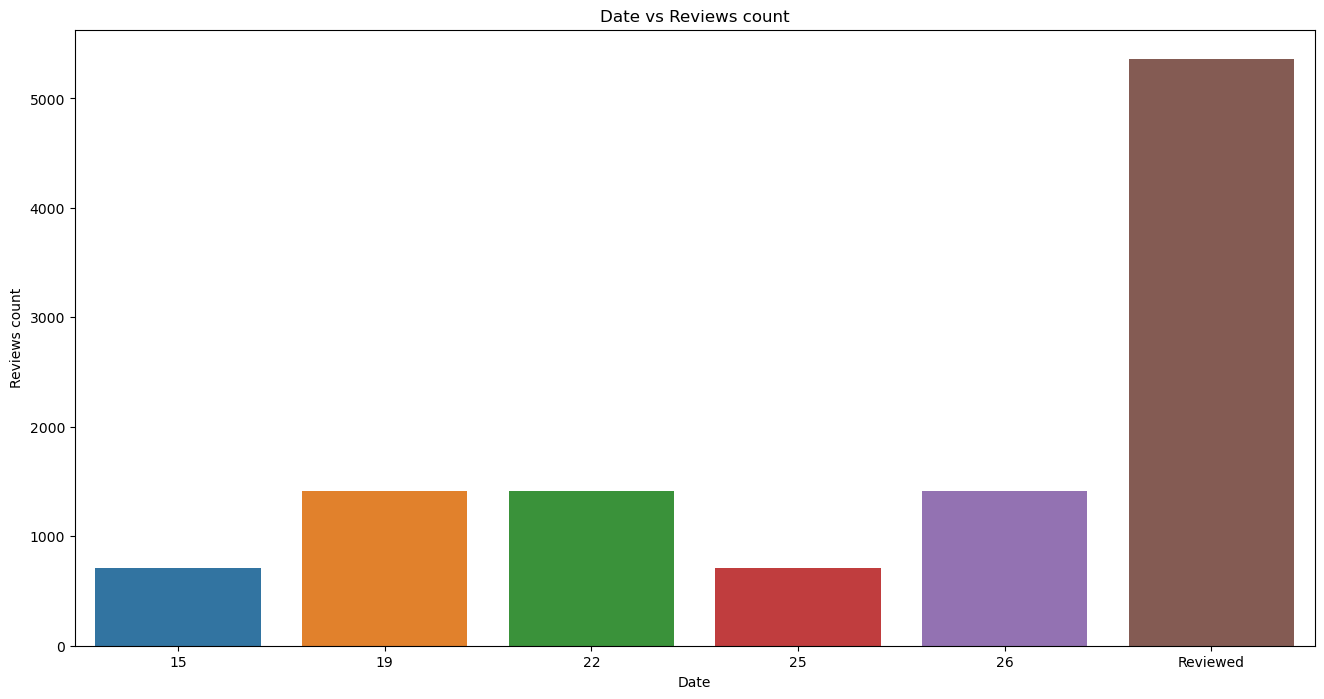

In [36]:
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date']
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()

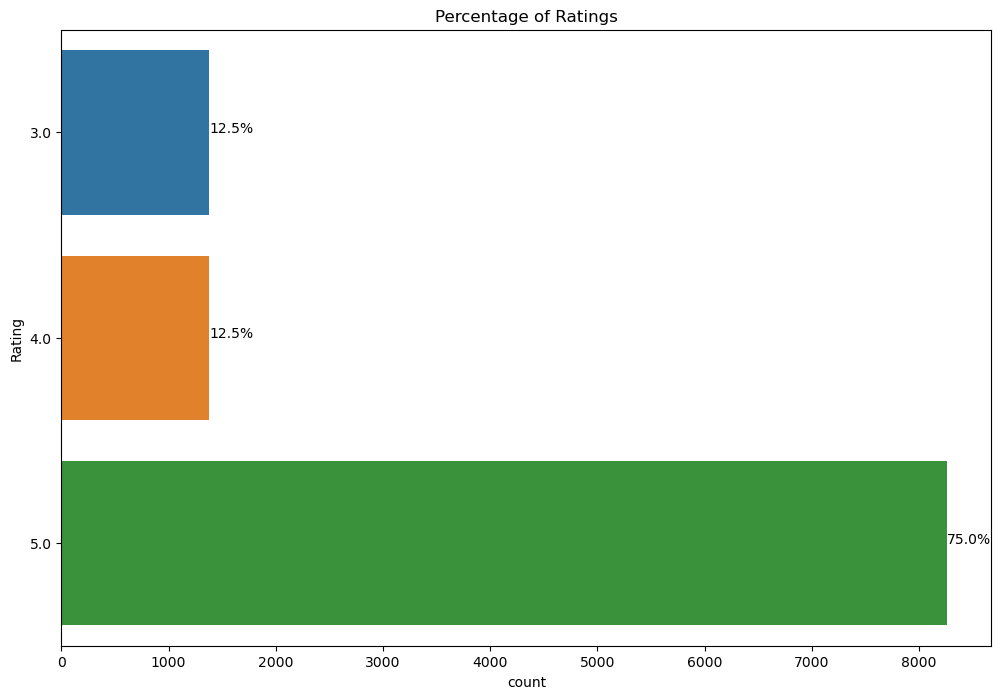

In [37]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

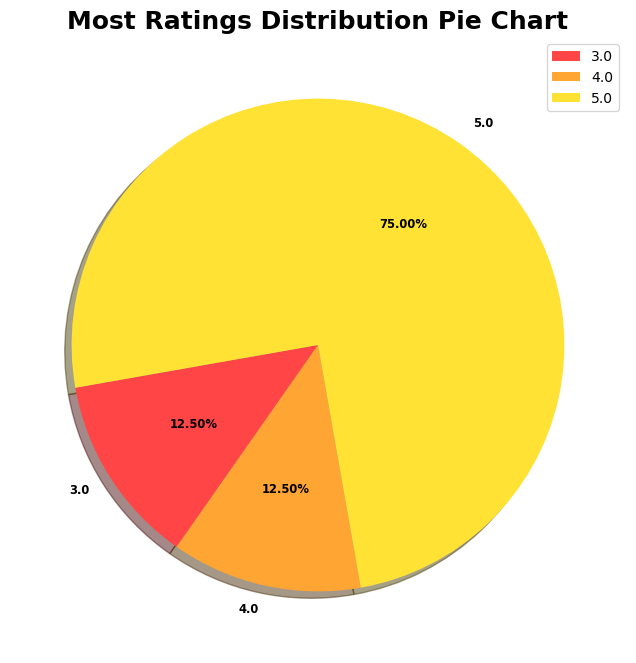

In [40]:
plt.figure(figsize = (12,8))
plt.pie(df['Rating'].value_counts().sort_index(),
       labels=df['Rating'].value_counts().sort_index().index,
       autopct= '%.2f%%',
       colors = ["#ff4545", "#ffa534",'#ffe234','#b7dd29','#57e32c'],
       shadow= True,
       startangle= 190,
       textprops = {'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Ratings Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

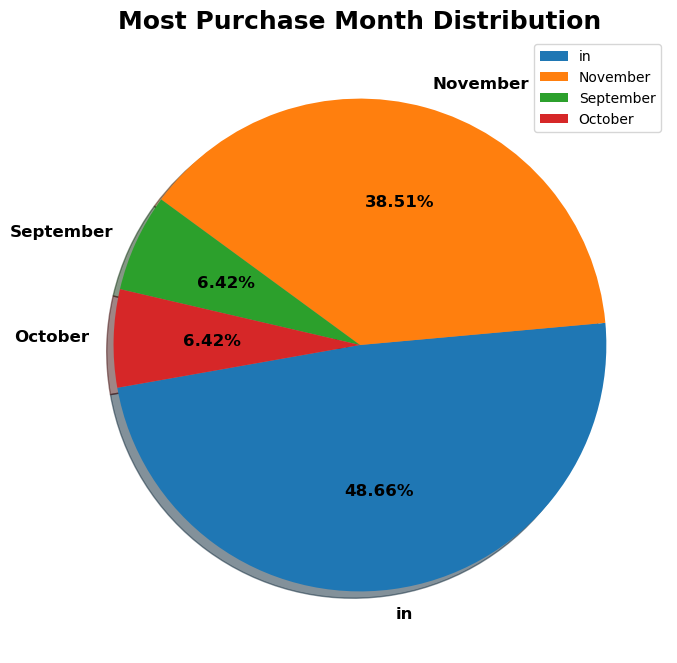

In [42]:
plt.figure(figsize = (12,8))
plt.pie(df['Month'].value_counts(),
       labels=df['Month'].value_counts().index,
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Most Purchase Month Distribution", fontsize = 18, fontweight = 'bold')
plt.show()

In [43]:
data = df[['Review']]
data

,Review
0,About the phoneApple phone without a second de...
1,Planned for Amazon exchange and thought I will...
2,The media could not be loaded.\n ...
3,"I love this phone, it has oblivious good build..."
4,This was my 1st iPhone really awesome mobile\n...
...,...
11011,"I love this phone, it has oblivious good build..."
11012,This was my 1st iPhone really awesome mobile\n...
11013,Read more
11014,A worthy upgrade for any1 coming from an iPhon...


In [44]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [45]:
data

,Review
0,"about phoneapple phone without second delay, i..."
1,planned amazon exchange thought i try iphone i...
2,the media could loaded. wanted 2 buy iphone 14...
3,"i love phone, oblivious good build quality, pr..."
4,this 1st iphone really awesome mobile read
...,...
11011,"i love phone, oblivious good build quality, pr..."
11012,this 1st iphone really awesome mobile read
11013,read
11014,a worthy upgrade any1 coming iphone 11 older m...


In [46]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/11016 [00:00<?, ?it/s]

In [47]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...


In [48]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [49]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [50]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [51]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [52]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [53]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [54]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [55]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [56]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [57]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [58]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...,"[phoneapple, phone, without, second, delay, wo..."
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...,"[planned, amazon, exchange, thought, try, ipho..."
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...,"[medium, could, loaded, wanted, buy, iphone, p..."
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build...","[love, phone, oblivious, good, build, quality,..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...,"[st, iphone, really, awesome, mobile, read]"
5,read,Read more,[read]
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...,"[worthy, upgrade, coming, iphone, older, model..."
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe...","[excellent, fantastic, team, power, speed, des..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...,"[phoneapple, phone, without, second, delay, wo..."
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...,"[planned, amazon, exchange, thought, try, ipho..."


In [59]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [61]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [62]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [63]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build..."
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...
5,read,Read more
6,worthy upgrade coming iphone older model read,A worthy upgrade for any1 coming from an iPhon...
7,excellent fantastic team power speed design qu...,"Excellent and fantastic in teams of power, spe..."
8,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...
9,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...


In [64]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['planned', 'amazon', 'exchange', 'thought', 'try', 'iphone', 'iphone', 'disaster', 'amazon', 'exchange', 'turned', 'faux', 'delivery', 'guy', 'seemed', 'pre', 'determined', 'accepting', 'old', 'samsung', 'phone', 'wanted', 'remove', 'almost', 'perfect', 'tempered', 'glass', 'check', 'screen', 'entered', 'incorrect', 'imei', 'number', 'phone', 'mobile', 'said', 'system', 'show', 'wrong', 'imei', 'can', 'not', 'exchange', 'wanted', 'pay', 'difference', 'return', 'delivery', 'ended', 'paying', 'extra', 'amount', 'replace', 'tempered', 'glass', 'phone', 'look', 'great', 'outside', 'ui', 'flawless', 'pro', 'super', 'smooth', 'touchgreat', 'look', 'outsideno', 'junk', 'apps', 'preinstalledgood', 'anti', 'tracking', 'safari', 'browsersafe', 'message', 'appwindows', 'corporate', 'apps', 'work', 'bettercons', 'average', 'photospoor', 'selfiesgo', 'back', 'function', 'top', 'screen', 'painpoor', 'file', 'managementno', 'option', 'add', 'memory', 'card', 'icloud', 'upgrade', 'come', 'pr

In [65]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [phoneapple, phone, without, second, delay, wo...
1    [planned, amazon, exchange, thought, try, ipho...
2    [medium, could, loaded, wanted, buy, iphone, p...
3    [love, phone, oblivious, good, build, quality,...
4          [st, iphone, really, awesome, mobile, read]
5                                               [read]
6    [worthy, upgrade, coming, iphone, older, model...
7    [excellent, fantastic, team, power, speed, des...
8    [phoneapple, phone, without, second, delay, wo...
9    [planned, amazon, exchange, thought, try, ipho...
Name: Clean_Reviews, dtype: object

In [66]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [67]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,phoneappl phone without second delay would say...
1,plan amazon exchang thought tri iphon iphon di...
2,medium could load want buy iphon pro max pictu...
3,love phone oblivi good build qualiti premium l...
4,st iphon realli awesom mobil read
...,...
11011,love phone oblivi good build qualiti premium l...
11012,st iphon realli awesom mobil read
11013,read
11014,worthi upgrad come iphon older model read


In [68]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,phoneapple phone without second delay would sa...
1,planned amazon exchange thought try iphone iph...
2,medium could loaded wanted buy iphone pro max ...
3,love phone oblivious good build quality premiu...
4,st iphone really awesome mobile read
...,...
11011,love phone oblivious good build quality premiu...
11012,st iphone really awesome mobile read
11013,read
11014,worthy upgrade coming iphone older model read


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [70]:
print(cv.get_feature_names()[109:200])

['handling', 'help', 'hence', 'however', 'icloud', 'imei', 'immensely', 'incorrect', 'instead', 'insurance', 'interesting', 'internally', 'iphone', 'issue', 'job', 'junk', 'know', 'late', 'layer', 'least', 'lens', 'like', 'loaded', 'loading', 'look', 'love', 'loved', 'make', 'making', 'managementno', 'max', 'may', 'medium', 'memory', 'message', 'might', 'mobile', 'model', 'module', 'money', 'much', 'must', 'never', 'note', 'number', 'oblivious', 'obviously', 'offered', 'old', 'older', 'option', 'outside', 'outsideno', 'painpoor', 'par', 'part', 'pay', 'paying', 'payment', 'perfect', 'performance', 'phone', 'phoneapple', 'photospoor', 'physical', 'picture', 'planned', 'please', 'policy', 'pop', 'possible', 'posture', 'power', 'practice', 'pre', 'preinstalledgood', 'premium', 'price', 'pricefile', 'privacy', 'private', 'pro', 'product', 'program', 'publish', 'purchase', 'quality', 'rare', 'rate', 'read', 'real']


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [71]:
print(cv.get_feature_names()[:100])

['accepting', 'activity', 'ad', 'add', 'added', 'additional', 'almost', 'along', 'already', 'also', 'amazon', 'amount', 'android', 'anti', 'apart', 'app', 'apple', 'application', 'apps', 'appwindows', 'available', 'average', 'awesome', 'back', 'basic', 'battery', 'best', 'better', 'bettercons', 'bluetooth', 'bought', 'box', 'browsersafe', 'build', 'business', 'buy', 'buying', 'cable', 'called', 'camera', 'cannot', 'carbon', 'card', 'care', 'case', 'change', 'charger', 'cheap', 'check', 'choose', 'claiming', 'color', 'come', 'coming', 'compare', 'comparison', 'component', 'concern', 'corporate', 'cost', 'could', 'cream', 'customer', 'daily', 'delay', 'delivery', 'design', 'designed', 'determined', 'developer', 'difference', 'different', 'disaster', 'displayed', 'due', 'edition', 'eliminating', 'ended', 'enjoy', 'entered', 'etc', 'even', 'excellent', 'except', 'exchange', 'exciting', 'expensive', 'experience', 'extra', 'fantastic', 'faux', 'feature', 'file', 'find', 'flawless', 'flow', '

In [72]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/11016 [00:00<?, ?it/s]

In [74]:
corpus[3]

'love phone oblivi good build qualiti premium look batteri excit still job read'

In [75]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [76]:
X.shape

(11016, 1058)

In [77]:
cv.get_feature_names()[:20]

['accept',
 'accept old',
 'accept old samsung',
 'activ',
 'activ applic',
 'activ applic respect',
 'ad',
 'ad featur',
 'ad featur daili',
 'ad featur seen',
 'add',
 'add memori',
 'add memori card',
 'addit',
 'addit featur',
 'addit featur may',
 'almost',
 'almost perfect',
 'almost perfect temper',
 'along']

In [78]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [79]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,accept,accept old,accept old samsung,activ,activ applic,activ applic respect,ad,ad featur,ad featur daili,ad featur seen,...,worthi upgrad,worthi upgrad come,would,would rate,would rate rear,would say,would say better,wrong,wrong imei,wrong imei cannot
0,0,0,0,1,1,1,2,2,1,1,...,0,0,1,0,0,1,1,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11014,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [80]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/11016 [00:00<?, ?it/s]

In [81]:
corpus[4]

'st iphon realli awesom mobil read'

In [82]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [83]:
X.shape

(11016, 1058)

In [84]:
tfidf_v.get_feature_names()[:20]

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['accept',
 'accept old',
 'accept old samsung',
 'activ',
 'activ applic',
 'activ applic respect',
 'ad',
 'ad featur',
 'ad featur daili',
 'ad featur seen',
 'add',
 'add memori',
 'add memori card',
 'addit',
 'addit featur',
 'addit featur may',
 'almost',
 'almost perfect',
 'almost perfect temper',
 'along']

In [85]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [86]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,accept,accept old,accept old samsung,activ,activ applic,activ applic respect,ad,ad featur,ad featur daili,ad featur seen,...,worthi upgrad,worthi upgrad come,would,would rate,would rate rear,would say,would say better,wrong,wrong imei,wrong imei cannot
0,0.000000,0.000000,0.000000,0.033402,0.033402,0.033402,0.066804,0.066804,0.033402,0.033402,...,0.000000,0.000000,0.025886,0.000000,0.000000,0.033402,0.033402,0.000000,0.000000,0.000000
1,0.055674,0.055674,0.055674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055674,0.055674,0.055674
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.062624,0.080807,0.080807,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11013,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.262169,0.262169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [87]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'phoneapple phone without second delay would say better android phone used phone like water flow way want shaping way best way possible phone designed show user want eliminating unnecessary ad feature seen android better android pay much money apple product obviously experience feature physical component camera lens etc apart basic thing also enjoy best application available app store developer might know app store policy application publish security posture towards handling payment apps etc publish best application way apps module switch flawless due called strict policy privacy program apple product iphone pop box screen apps want track activity application respect apple show concern user apple phone like v reason may business practice followed th edition please note iphone making change internally like physical component small change battery performance lens edition additional feature may satisfy buy edition find change interesting go physical even camera visually much different v c

In [88]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [89]:
for token in doc_block[:50]:
    print(token,token.pos_)  

phoneapple VERB
phone NOUN
without ADP
second ADJ
delay NOUN
would AUX
say VERB
better ADV
android VERB
phone NOUN
used VERB
phone NOUN
like ADP
water NOUN
flow NOUN
way NOUN
want VERB
shaping VERB
way NOUN
best ADJ
way ADV
possible ADJ
phone NOUN
designed VERB
show NOUN
user NOUN
want VERB
eliminating VERB
unnecessary ADJ
ad NOUN
feature NOUN
seen VERB
android VERB
better ADV
android VERB
pay VERB
much ADJ
money NOUN
apple NOUN
product NOUN
obviously ADV
experience VERB
feature NOUN
physical ADJ
component NOUN
camera NOUN
lens NOUN
etc X
apart ADP
basic ADJ


In [95]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,5
1,apple,4
2,application,4
3,android,3
4,way,3
5,want,3
6,feature,3
7,apps,3
8,change,3
9,show,2


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

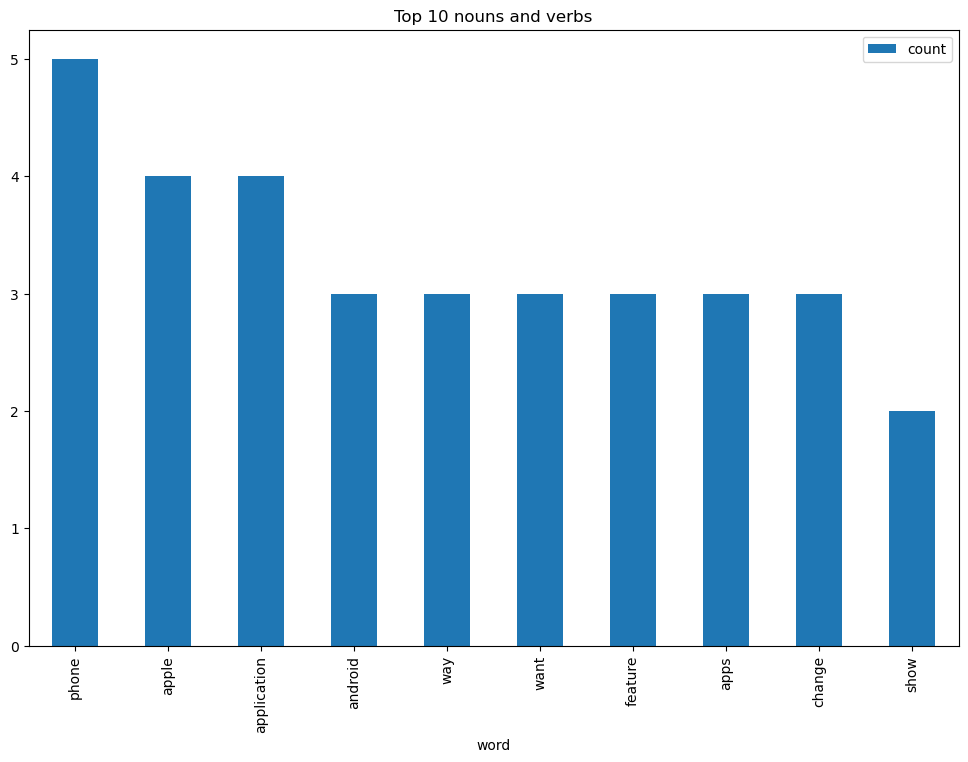

In [96]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [97]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [98]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [99]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,11016


In [100]:
dataframe.Clean_Reviews[8]

'phoneapple phone without second delay would say better android phone used phone like water flow way want shaping way best way possible phone designed show user want eliminating unnecessary ad feature seen android better android pay much money apple product obviously experience feature physical component camera lens etc apart basic thing also enjoy best application available app store developer might know app store policy application publish security posture towards handling payment apps etc publish best application way apps module switch flawless due called strict policy privacy program apple product iphone pop box screen apps want track activity application respect apple show concern user apple phone like v reason may business practice followed th edition please note iphone making change internally like physical component small change battery performance lens edition additional feature may satisfy buy edition find change interesting go physical even camera visually much different v c

In [101]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.027, 'neu': 0.682, 'pos': 0.291, 'compound': 0.9969}

In [105]:
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.027, 'neu': 0.682, 'pos': 0.291, 'compound': 0.9969}

In [106]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,phoneapple phone without second delay would sa...,"{'neg': 0.027, 'neu': 0.682, 'pos': 0.291, 'co..."
1,planned amazon exchange thought try iphone iph...,"{'neg': 0.075, 'neu': 0.709, 'pos': 0.217, 'co..."
2,medium could loaded wanted buy iphone pro max ...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp..."
3,love phone oblivious good build quality premiu...,"{'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'comp..."
4,st iphone really awesome mobile read,"{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'comp..."


In [107]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,phoneapple phone without second delay would sa...,"{'neg': 0.027, 'neu': 0.682, 'pos': 0.291, 'co...",0.9969
1,planned amazon exchange thought try iphone iph...,"{'neg': 0.075, 'neu': 0.709, 'pos': 0.217, 'co...",0.9325
2,medium could loaded wanted buy iphone pro max ...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.8360
3,love phone oblivious good build quality premiu...,"{'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'comp...",0.8834
4,st iphone really awesome mobile read,"{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'comp...",0.6590


In [108]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,phoneapple phone without second delay would sa...,"{'neg': 0.027, 'neu': 0.682, 'pos': 0.291, 'co...",0.9969,Positive
1,planned amazon exchange thought try iphone iph...,"{'neg': 0.075, 'neu': 0.709, 'pos': 0.217, 'co...",0.9325,Positive
2,medium could loaded wanted buy iphone pro max ...,"{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'comp...",0.8360,Positive
3,love phone oblivious good build quality premiu...,"{'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'comp...",0.8834,Positive
4,st iphone really awesome mobile read,"{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'comp...",0.6590,Positive
...,...,...,...,...
11011,love phone oblivious good build quality premiu...,"{'neg': 0.0, 'neu': 0.493, 'pos': 0.507, 'comp...",0.8834,Positive
11012,st iphone really awesome mobile read,"{'neg': 0.0, 'neu': 0.532, 'pos': 0.468, 'comp...",0.6590,Positive
11013,read,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
11014,worthy upgrade coming iphone older model read,"{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...",0.4404,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

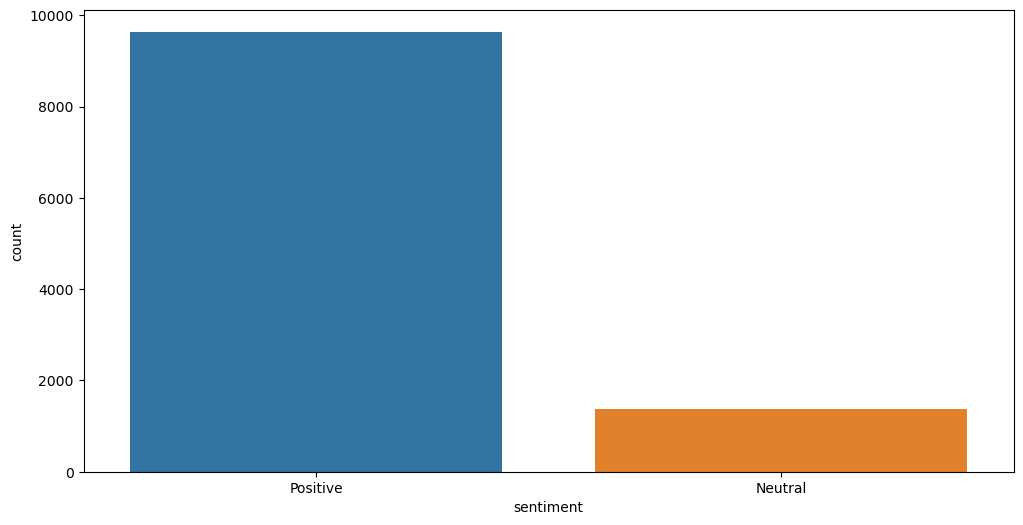

In [116]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15160\3383353206.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='compound', ylabel='Density'>

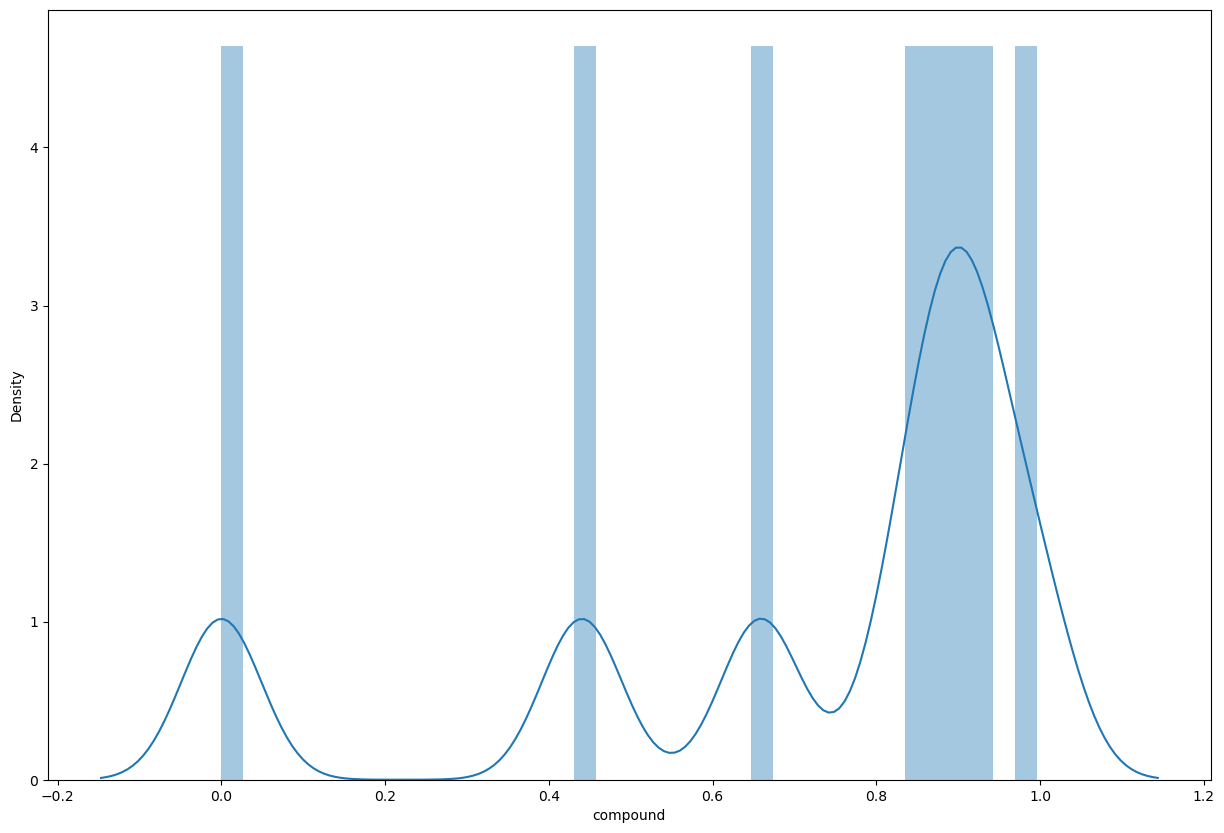

In [117]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [126]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,9639
neg,1377


In [128]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...,0.408962,0.206098
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...,0.461905,0.238095
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...,0.480000,-0.040000
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build...",0.666667,0.500000
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...,1.000000,1.000000


Text(0, 0.5, 'Subjectivity')

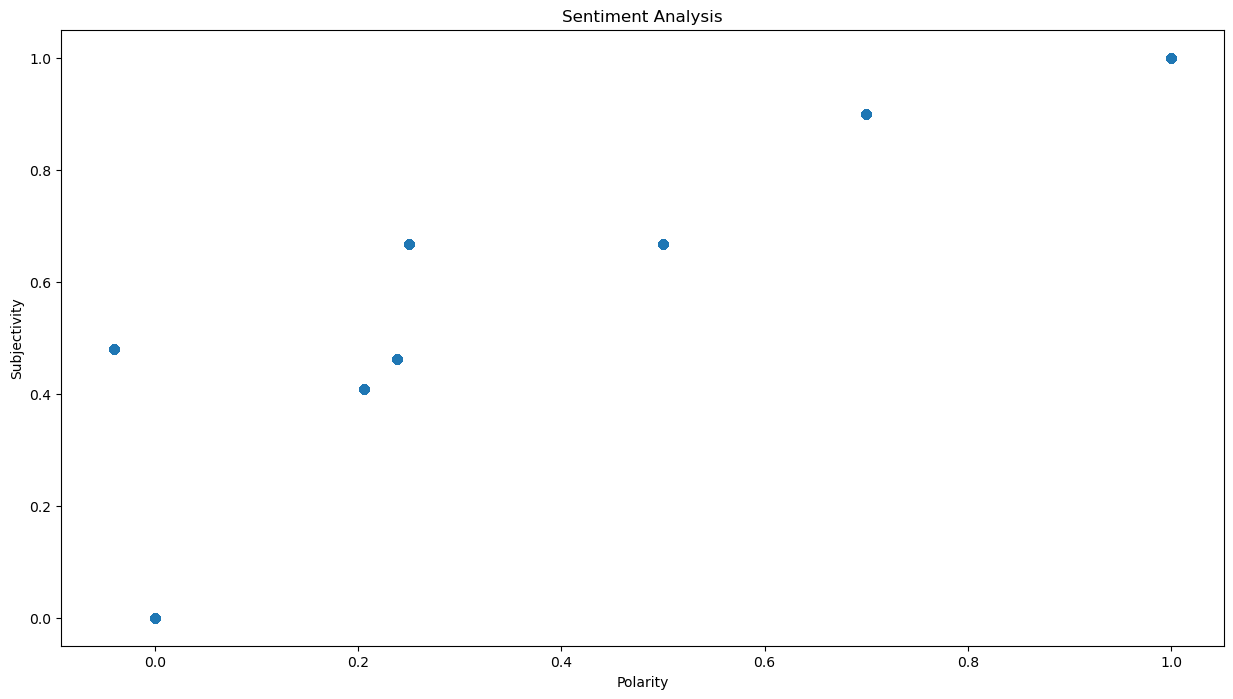

In [129]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [130]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")


type_ = ["Positive", "Neutral", "Negative"]
fig = make_subplots(rows=1, cols=1)

fig.add_trace(go.Pie(labels=type_, values=df['sentiment'].value_counts(), name="sentiment"))

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Sentiment Analysis",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sentiment', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [132]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,phoneapple phone without second delay would sa...,About the phoneApple phone without a second de...,0.408962,0.206098,pos
1,planned amazon exchange thought try iphone iph...,Planned for Amazon exchange and thought I will...,0.461905,0.238095,pos
2,medium could loaded wanted buy iphone pro max ...,The media could not be loaded.\n ...,0.480000,-0.040000,pos
3,love phone oblivious good build quality premiu...,"I love this phone, it has oblivious good build...",0.666667,0.500000,pos
4,st iphone really awesome mobile read,This was my 1st iPhone really awesome mobile\n...,1.000000,1.000000,pos


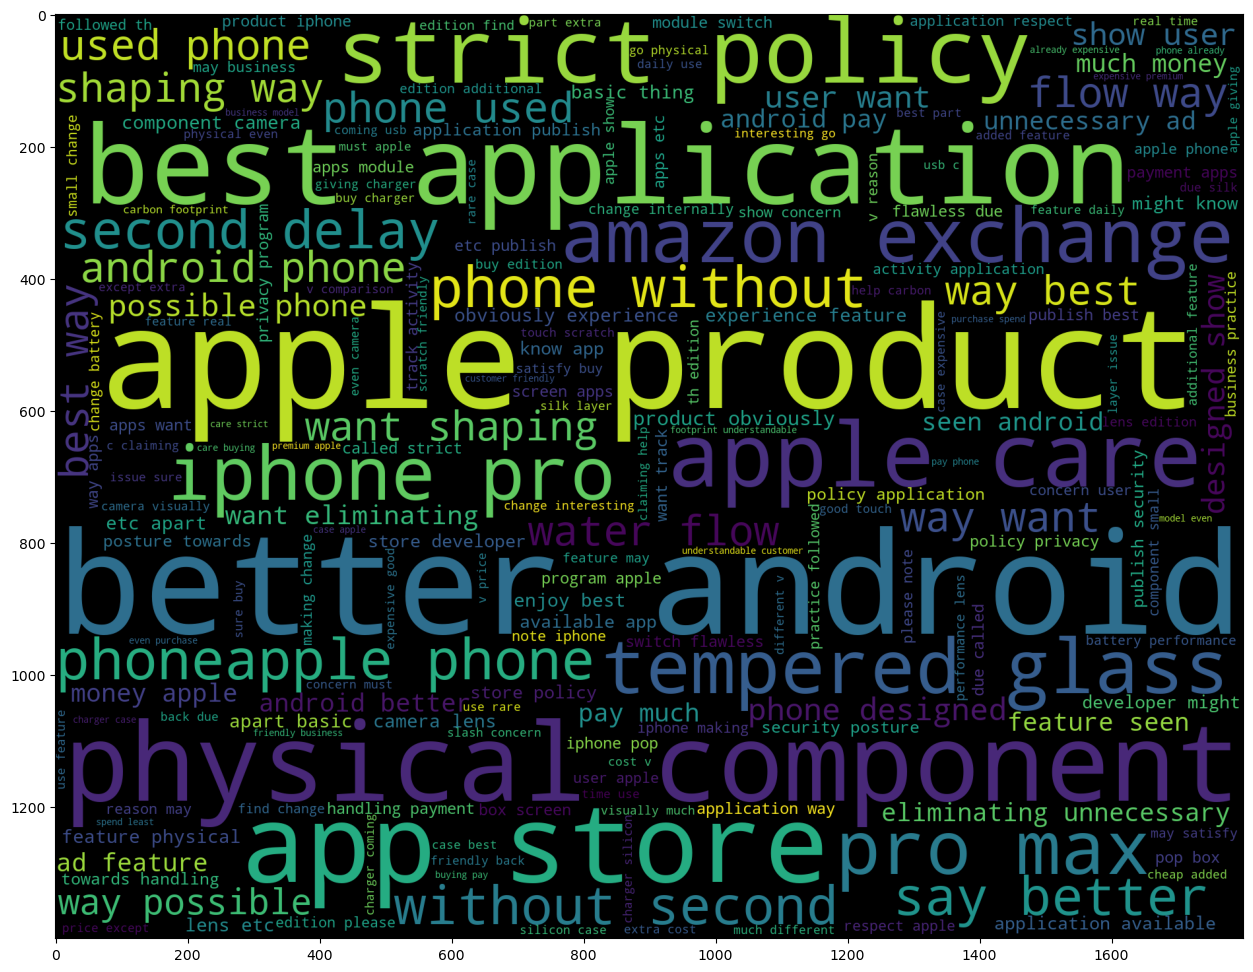

In [133]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [134]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

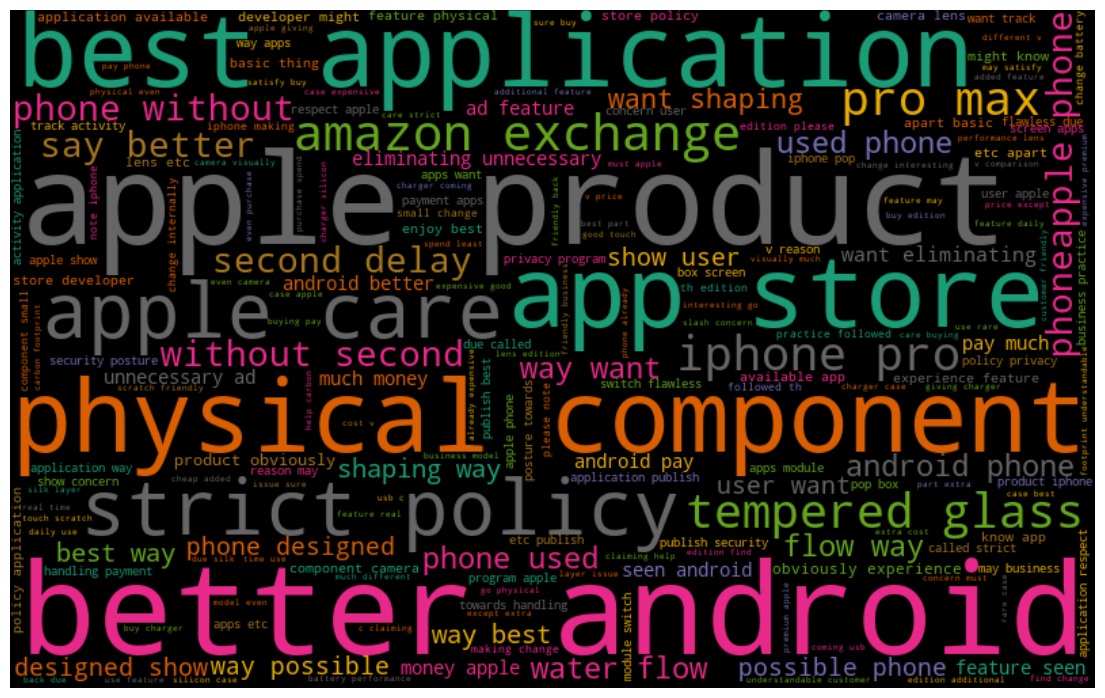

In [135]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)